# PyTorch Workflow

The typical` DL/ML workflow in PyTorch involves:

- Preparing and loading collected data
- Building models
- Fitting/Training the model on the data
- Making Predictions aka. Inference
- Saving and reloading trained models
- Putting it all together

In [1]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Check for PyTorch version
torch.__version__

'2.1.1+cu118'

## Data (Preparing and Loading)

Machine Learning is a game of two parts:
- Get data into numerical representation
- Build a model to learn patterns in that data

To showcase this, lets create some known data using linear regression formula. We will make a straight line with known **parameters**.

> While creating models we come across the concept of features and labels. Features are the characteristics that the model will evaluate from the training data input and labels are the entities or names or values the model is trained to associate the features to. For example, a CNN trained on a dataset of celebrity faces will have the image of their faces as the feature data and the name of the celebrity will be the feature's label. 


In [2]:
# Establishing known parameters
weight = 0.7 # eight is the coefficient of the weighted sum
bias = 0.3 # bias is an additional constant to be added to the weighted sum to threshold the activation
start = 0
end = 1
step = .02
X = torch.arange(start, end, step).unsqueeze(dim=1)
# We created a range of numbers from 0 to 1 with steps of 0.02 and then wrapped each number in another dimension so the dimension of X will be ([50,1])
Y = weight * X + bias
# We map each element of X to Y with a function
# print(f"x:{X[:10]}\ny:{Y[:10]}")
# print(len(X), len(Y), X.shape, Y.shape)


### Splitting data into learning and testing sets

One of the most important concepts in machine learning is dividing our data into a set that we learn the patterns from and a set on which we validate our model.

There are three types of datasets in machine learning:
- The training set
- The validation set
- The test set

This is done to generalize our models(make sure it is able to work on datasets that it has never seen before.)

In [3]:
# Creating a training and testing set of our data

train_split = int(.8 * len(X)) 
# We index with integers so it is crucial to convert it into an integer given that the value is implicitly typecast into a float 
train_split

X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]

40

A better way to understand our data is to visualize them

In [4]:
def plot_predictions(train_data = X_train,
                     train_labels = Y_train, 
                     test_data = X_test, 
                     test_labels = Y_test, 
                     predictions = None):
  """
  Plots the training data, test data and compares the predictions
  """
  plt.figure(figsize=(10,7)) # Figure dimensions in inches

  # Plotting the training data in blue
  plt.scatter(X_train, Y_train, c="b", s=4, label="Training Data") # (<data-x>, <data-y>, <color>, <scale>, <label>)

  # Plotting the test data in green
  plt.scatter(X_test, Y_test, c="orange", s=4, label="Test Data")

  # Checking if any predictions have been made
  if predictions is not None:
    # Plot the predictions
    plt.scatter(X_test, predictions, c="r", s=4, label="Predictions")

  # Displaying the legend
  plt.legend(prop={"size" : 14}); # (<property dictionary>)

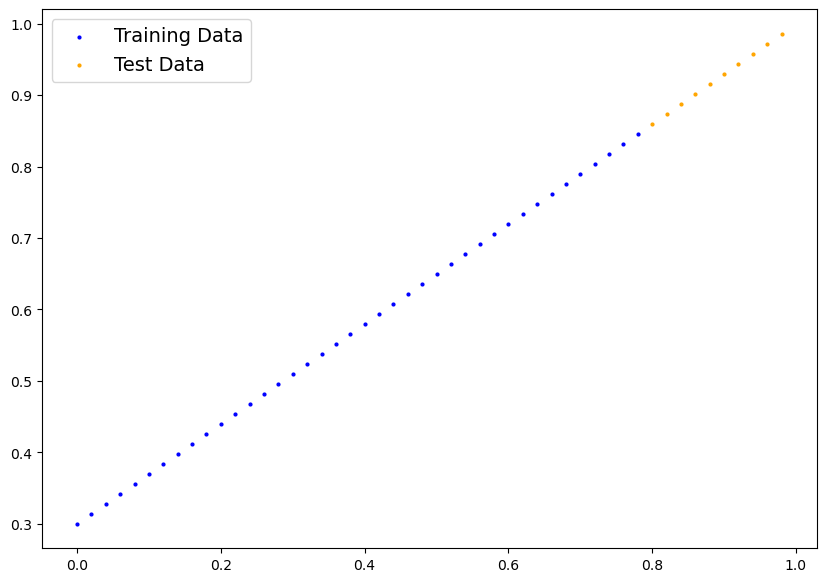

In [5]:
plot_predictions()

Now let's build a model that is able to predict the function based on the training set for the test set.

In [6]:
# Creating a linear regression model class

class LinearRegressionModel(nn.Module): # Almost everything in PyTorch inherits nn.Module
  def __init__(self):
    super.__init__() # We initialize the parent class by referring to it as super
    self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    # Defining a forward function to represent the computation in model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # We did a little bit of type hinting here, we'll dive into it better below. However, x is the input data here
      return self.weight * x + self.bias # We returned the value of the function as per the current model's state (weight, bias)
  

A couple of things to bring to light from the above code block:

* the `super` method calls the parent class and here we are initializing the parent nn.Module superclass
* the `requires_grad` argument asks PyTorch to keep track of gradients of the parameters as we will employ `gradient descent` and `back propagation` to update our parameters
* while defining the forward method we employed 'type hinting' which causes the method to expect a tensor as input and the `->` indicated that the method will return a tensor as well
* any subclass of nn.Module must override the forward method ( overridig is done by defining the method in the subclass again )

> What does the model do?

It:
* starts with random values for the parameters
* looks at the training data and adjust the random values to better suit or represent the ideal values

> How does it do so?

Through:
* Gradient Descent
* Back Propagation


# Timestamp: 5:14:19